In [23]:
import requests
import json
import pandas as pd
import os
from bs4 import BeautifulSoup

In [25]:
CLIENT_ID = 'x'
CLIENT_SECRET = 'x'

In [26]:
AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [27]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [28]:
# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

# Track ID from the URI
track_id = '01TyFEZu6mHbffsVfxgrFn'

# actual GET request with proper header
r = requests.get(BASE_URL + 'audio-features/' + track_id, headers=headers)


In [29]:
def search_artists(artist_name):
    headers = {'Authorization': 'Bearer {token}'.format(token=access_token)}
    params = {'q': artist_name, 'type': 'artist', 'limit': 1}
    search_url = BASE_URL + 'search'
    response = requests.get(search_url, headers=headers, params=params)
    data = response.json()
    artist_ids = []
    for artist in data['artists']['items']:
        artist_ids.append(artist['id'])
    return artist_ids


In [30]:
search_artists('rihanna')

['5pKCCKE2ajJHZ9KAiaK11H']

In [32]:
import datetime
import billboard
import pandas as pd
from collections import defaultdict

# Initiate the dictionary to store artist data
artist_data = defaultdict(int)

# Set the date for 5 years ago
date = datetime.datetime.now() - datetime.timedelta(weeks=20)

# Loop over each week for the past 5 years
while date < datetime.datetime.now():
    # Fetch the top 100 songs for this week
    chart = billboard.ChartData('hot-100', date=date.strftime('%Y-%m-%d'))

    # Loop over each song in the chart
    for song in chart:
        # Loop over each artist for the song (songs can have multiple artists)
        for artist in song.artist.split(' Featuring '):
            # Increment the number of weeks this artist has been in the top 100
            artist_data[artist] += 1

    # Increment the date by one week
    date += datetime.timedelta(weeks=1)

BillboardParseException: Failed to parse metadata value: last

In [16]:
# Convert the artist data into a DataFrame
df = pd.DataFrame(list(artist_data.items()), columns=['Artist', 'WeeksInTop100'])

# Sort the DataFrame by the number of weeks in the top 100
df = df.sort_values('WeeksInTop100', ascending=False)

# Print the top 10 artists
print(df.head(10))

                Artist  WeeksInTop100
42       Morgan Wallen            225
10                 SZA            145
61          Luke Combs             61
7         Taylor Swift             54
19   Drake & 21 Savage             53
100           Lil Baby             47
60       Lainey Wilson             35
38          Zach Bryan             35
47        Lil Uzi Vert             27
54    Bailey Zimmerman             26


In [17]:
import datetime
import billboard
import pandas as pd
from collections import defaultdict

# Initiate the dictionary to store artist data
artist_data = defaultdict(int)

# Set the date for 5 years ago
date = datetime.datetime.now() - datetime.timedelta(weeks=5*52)

# Loop over each week for the past 5 years
while date < datetime.datetime.now():
    # Fetch the top 100 songs for this week
    chart = billboard.ChartData('hot-100', date=date.strftime('%Y-%m-%d'))

    # Loop over each song in the chart
    for song in chart:
        # Loop over each artist for the song (songs can have multiple artists)
        for artist in song.artist.split(' Featuring '):
            # Increment the number of weeks this artist has been in the top 100
            artist_data[artist] += 1

    # Increment the date by one week
    date += datetime.timedelta(weeks=1)

# Convert the artist data into a DataFrame
df = pd.DataFrame(list(artist_data.items()), columns=['Artist', 'Total Chart Entries Weekly for Past 5 years'])

# Sort the DataFrame by the number of weeks in the top 100
df = df.sort_values('Total Chart Entries Weekly for Past 5 years', ascending=False)

# Print the top 10 artists
print(df.head(10))

            Artist  Total Chart Entries Weekly for Past 5 years
0            Drake                                          846
54   Morgan Wallen                                          638
78        Lil Baby                                          504
33    Taylor Swift                                          437
37      Luke Combs                                          379
2      Post Malone                                          378
523       Doja Cat                                          378
367         DaBaby                                          337
397            SZA                                          310
178  Billie Eilish                                          281


In [18]:
topten_df = (df.head(10))


In [19]:
topten_df['Artist']

0              Drake
54     Morgan Wallen
78          Lil Baby
33      Taylor Swift
37        Luke Combs
2        Post Malone
523         Doja Cat
367           DaBaby
397              SZA
178    Billie Eilish
Name: Artist, dtype: object

In [20]:
topten_list = topten_df['Artist'].values.tolist()

In [21]:
topten_list


['Drake',
 'Morgan Wallen',
 'Lil Baby',
 'Taylor Swift',
 'Luke Combs',
 'Post Malone',
 'Doja Cat',
 'DaBaby',
 'SZA',
 'Billie Eilish']

In [35]:
# Example usage
artists = ['Rhianna', 'Drake', 'Lana del ray']

artist_ids = []
for artist in topten_list:
    artist_ids += search_artists(artist)
print(artist_ids)

['3TVXtAsR1Inumwj472S9r4', '4oUHIQIBe0LHzYfvXNW4QM', '5f7VJjfbwm532GiveGC0ZK', '06HL4z0CvFAxyc27GXpf02', '718COspgdWOnwOFpJHRZHS', '246dkjvS1zLTtiykXe5h60', '5cj0lLjcoR7YOSnhnX0Po5', '4r63FhuTkUYltbVAg5TQnk', '7tYKF4w9nC0nq9CsPZTHyP', '6qqNVTkY8uBg9cP3Jd7DAH']


In [36]:
artist_data = []
for artist in topten_list:
    artist_ids = search_artists(artist)
    for artist_id in artist_ids:
        artist_data.append({'name': artist, 'id': artist_id})
artist_df = pd.DataFrame(artist_data)
print(artist_df)

            name                      id
0          Drake  3TVXtAsR1Inumwj472S9r4
1  Morgan Wallen  4oUHIQIBe0LHzYfvXNW4QM
2       Lil Baby  5f7VJjfbwm532GiveGC0ZK
3   Taylor Swift  06HL4z0CvFAxyc27GXpf02
4     Luke Combs  718COspgdWOnwOFpJHRZHS
5    Post Malone  246dkjvS1zLTtiykXe5h60
6       Doja Cat  5cj0lLjcoR7YOSnhnX0Po5
7         DaBaby  4r63FhuTkUYltbVAg5TQnk
8            SZA  7tYKF4w9nC0nq9CsPZTHyP
9  Billie Eilish  6qqNVTkY8uBg9cP3Jd7DAH


In [37]:
r = r.json()
r

{'danceability': 0.791,
 'energy': 0.267,
 'key': 5,
 'loudness': -11.997,
 'mode': 1,
 'speechiness': 0.0415,
 'acousticness': 0.674,
 'instrumentalness': 0.534,
 'liveness': 0.102,
 'valence': 0.544,
 'tempo': 165.99,
 'type': 'audio_features',
 'id': '01TyFEZu6mHbffsVfxgrFn',
 'uri': 'spotify:track:01TyFEZu6mHbffsVfxgrFn',
 'track_href': 'https://api.spotify.com/v1/tracks/01TyFEZu6mHbffsVfxgrFn',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/01TyFEZu6mHbffsVfxgrFn',
 'duration_ms': 215111,
 'time_signature': 4}

In [252]:
r

{'danceability': 0.791,
 'energy': 0.267,
 'key': 5,
 'loudness': -11.997,
 'mode': 1,
 'speechiness': 0.0415,
 'acousticness': 0.674,
 'instrumentalness': 0.534,
 'liveness': 0.102,
 'valence': 0.544,
 'tempo': 165.99,
 'type': 'audio_features',
 'id': '01TyFEZu6mHbffsVfxgrFn',
 'uri': 'spotify:track:01TyFEZu6mHbffsVfxgrFn',
 'track_href': 'https://api.spotify.com/v1/tracks/01TyFEZu6mHbffsVfxgrFn',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/01TyFEZu6mHbffsVfxgrFn',
 'duration_ms': 215111,
 'time_signature': 4}

In [38]:
artist_df

,name,id
0,Drake,3TVXtAsR1Inumwj472S9r4
1,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM
2,Lil Baby,5f7VJjfbwm532GiveGC0ZK
3,Taylor Swift,06HL4z0CvFAxyc27GXpf02
4,Luke Combs,718COspgdWOnwOFpJHRZHS
5,Post Malone,246dkjvS1zLTtiykXe5h60
6,Doja Cat,5cj0lLjcoR7YOSnhnX0Po5
7,DaBaby,4r63FhuTkUYltbVAg5TQnk
8,SZA,7tYKF4w9nC0nq9CsPZTHyP
9,Billie Eilish,6qqNVTkY8uBg9cP3Jd7DAH


In [39]:
def artist_album(artist_id):
    albums = requests.get(BASE_URL + 'artists/' + artist_id + '/albums', 
                 headers=headers, 
                 params={'include_groups': 'album', 'limit': 50})
    d = albums.json()
    album_name = []
    for album in d['items']:
        album_name += (album['name'],)
    return album_name

In [40]:
artist_album('5pKCCKE2ajJHZ9KAiaK11H')

['Black Panther: Wakanda Forever - Music From and Inspired By',
 'ANTI (Deluxe)',
 'ANTI (Deluxe)',
 'ANTI',
 'ANTI',
 'Unapologetic (Deluxe Version)',
 'Unapologetic (Deluxe Version)',
 'Unapologetic (Deluxe)',
 'Unapologetic (Deluxe)',
 'Unapologetic',
 'Unapologetic',
 'Unapologetic (Deluxe)',
 'Unapologetic (Edited Version)',
 'Talk That Talk (Deluxe)',
 'Talk That Talk (Deluxe)',
 'Unapologetic (Deluxe Version [Edited])',
 'Unapologetic (Standard Version [Edited])',
 'Unapologetic (Edited Version)',
 'Talk That Talk',
 'Talk That Talk',
 'Talk That Talk (Deluxe Explicit)',
 'Talk That Talk (Deluxe Edited)',
 'Talk That Talk (Explicit)',
 'Talk That Talk (Edited)',
 'Loud',
 'Loud',
 'Loud',
 'Rated R: Remixed',
 'Rated R: Remixed',
 'Loud (Japan Version)',
 'Rated R',
 'Rated R',
 'Rated R (International Explicit Nokia Exclusive Version)',
 'Rated R',
 'Good Girl Gone Bad: The Remixes',
 'Good Girl Gone Bad: Reloaded',
 'Good Girl Gone Bad: Reloaded',
 'Good Girl Gone Bad: Reloade

In [41]:
artist_df["album"] = artist_df['id'].apply(artist_album)

In [42]:
artist_df

,name,id,album
0,Drake,3TVXtAsR1Inumwj472S9r4,"[Her Loss, Her Loss, Honestly, Nevermind, Hone..."
1,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,"[One Thing At A Time, One Thing At A Time, Dan..."
2,Lil Baby,5f7VJjfbwm532GiveGC0ZK,"[It's Only Me, It's Only Me, The Voice of the ..."
3,Taylor Swift,06HL4z0CvFAxyc27GXpf02,"[Midnights (The Til Dawn Edition), Midnights (..."
4,Luke Combs,718COspgdWOnwOFpJHRZHS,"[Gettin' Old, Growin' Up, What You See Ain't A..."
5,Post Malone,246dkjvS1zLTtiykXe5h60,"[Twelve Carat Toothache (Deluxe), Twelve Carat..."
6,Doja Cat,5cj0lLjcoR7YOSnhnX0Po5,"[Planet Her (Deluxe), Planet Her (Deluxe), Pla..."
7,DaBaby,4r63FhuTkUYltbVAg5TQnk,"[Baby On Baby 2, Baby On Baby 2, BETTER THAN Y..."
8,SZA,7tYKF4w9nC0nq9CsPZTHyP,"[SOS, SOS, Ctrl (Deluxe), Dear Evan Hansen (Or..."
9,Billie Eilish,6qqNVTkY8uBg9cP3Jd7DAH,"[Happier Than Ever, Happier Than Ever, WHEN WE..."


In [43]:
artist_df['album']

0    [Her Loss, Her Loss, Honestly, Nevermind, Hone...
1    [One Thing At A Time, One Thing At A Time, Dan...
2    [It's Only Me, It's Only Me, The Voice of the ...
3    [Midnights (The Til Dawn Edition), Midnights (...
4    [Gettin' Old, Growin' Up, What You See Ain't A...
5    [Twelve Carat Toothache (Deluxe), Twelve Carat...
6    [Planet Her (Deluxe), Planet Her (Deluxe), Pla...
7    [Baby On Baby 2, Baby On Baby 2, BETTER THAN Y...
8    [SOS, SOS, Ctrl (Deluxe), Dear Evan Hansen (Or...
9    [Happier Than Ever, Happier Than Ever, WHEN WE...
Name: album, dtype: object

In [44]:
r.keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [45]:
artist_df['album'].keys()

RangeIndex(start=0, stop=10, step=1)

In [46]:
d.keys()

NameError: name 'd' is not defined

In [47]:
data = []
albums = []

In [48]:
def album_features(artist_id):
    r = requests.get(BASE_URL + 'artists/' + artist_id + '/albums', 
                 headers=headers, 
                 params={'include_groups': 'album', 'limit': 50})
    d = r.json()
    
    for album in d['items']:
        album_name = album['name']
    
    # here's a hacky way to skip over albums we've already grabbed
    trim_name = album_name.split('(')[0].strip()

    
    # this takes a few seconds so let's keep track of progress    
    
    
    # pull all tracks from this album
    a_tracks = requests.get(BASE_URL + 'albums/' + album['id'] + '/tracks', 
        headers=headers)
    tracks = a_tracks.json()['items']
    
    for track in tracks:
        # get audio features (key, liveness, danceability, ...)
        f = requests.get(BASE_URL + 'audio-features/' + track['id'], 
            headers=headers)
        f = f.json()
        
        # combine with album info
        f.update({
            'track_name': track['name'],
            'album_name': album_name,
            'short_album_name': trim_name,
            'release_date': album['release_date'],
            'album_id': album['id']
        })
        
        data.append(f)

    return data    



In [49]:
album_features('5pKCCKE2ajJHZ9KAiaK11H')

[{'danceability': 0.779,
  'energy': 0.64,
  'key': 7,
  'loudness': -8.415,
  'mode': 1,
  'speechiness': 0.159,
  'acousticness': 0.000155,
  'instrumentalness': 0.00077,
  'liveness': 0.101,
  'valence': 0.498,
  'tempo': 99.019,
  'type': 'audio_features',
  'id': '4TsmezEQVSZNNPv5RJ65Ov',
  'uri': 'spotify:track:4TsmezEQVSZNNPv5RJ65Ov',
  'track_href': 'https://api.spotify.com/v1/tracks/4TsmezEQVSZNNPv5RJ65Ov',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4TsmezEQVSZNNPv5RJ65Ov',
  'duration_ms': 246960,
  'time_signature': 4,
  'track_name': 'Pon de Replay',
  'album_name': 'Music Of The Sun',
  'short_album_name': 'Music Of The Sun',
  'release_date': '2005-08-29',
  'album_id': '4FyGpObwABjn0o8Tdp7AZz'},
 {'danceability': 0.681,
  'energy': 0.611,
  'key': 5,
  'loudness': -5.939,
  'mode': 0,
  'speechiness': 0.077,
  'acousticness': 0.000332,
  'instrumentalness': 0.00193,
  'liveness': 0.12,
  'valence': 0.637,
  'tempo': 83.463,
  'type': 'audio_features',
 

In [50]:
artist_df["Features"] = artist_df['id'].apply(album_features)

In [51]:
artist_df

,name,id,album,Features
0,Drake,3TVXtAsR1Inumwj472S9r4,"[Her Loss, Her Loss, Honestly, Nevermind, Hone...","[{'danceability': 0.779, 'energy': 0.64, 'key'..."
1,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,"[One Thing At A Time, One Thing At A Time, Dan...","[{'danceability': 0.779, 'energy': 0.64, 'key'..."
2,Lil Baby,5f7VJjfbwm532GiveGC0ZK,"[It's Only Me, It's Only Me, The Voice of the ...","[{'danceability': 0.779, 'energy': 0.64, 'key'..."
3,Taylor Swift,06HL4z0CvFAxyc27GXpf02,"[Midnights (The Til Dawn Edition), Midnights (...","[{'danceability': 0.779, 'energy': 0.64, 'key'..."
4,Luke Combs,718COspgdWOnwOFpJHRZHS,"[Gettin' Old, Growin' Up, What You See Ain't A...","[{'danceability': 0.779, 'energy': 0.64, 'key'..."
5,Post Malone,246dkjvS1zLTtiykXe5h60,"[Twelve Carat Toothache (Deluxe), Twelve Carat...","[{'danceability': 0.779, 'energy': 0.64, 'key'..."
6,Doja Cat,5cj0lLjcoR7YOSnhnX0Po5,"[Planet Her (Deluxe), Planet Her (Deluxe), Pla...","[{'danceability': 0.779, 'energy': 0.64, 'key'..."
7,DaBaby,4r63FhuTkUYltbVAg5TQnk,"[Baby On Baby 2, Baby On Baby 2, BETTER THAN Y...","[{'danceability': 0.779, 'energy': 0.64, 'key'..."
8,SZA,7tYKF4w9nC0nq9CsPZTHyP,"[SOS, SOS, Ctrl (Deluxe), Dear Evan Hansen (Or...","[{'danceability': 0.779, 'energy': 0.64, 'key'..."
9,Billie Eilish,6qqNVTkY8uBg9cP3Jd7DAH,"[Happier Than Ever, Happier Than Ever, WHEN WE...","[{'danceability': 0.779, 'energy': 0.64, 'key'..."


In [52]:
artist_df.to_csv('artist_info.csv')

In [53]:
df = pd.DataFrame(data)

In [54]:
df.keys()

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'track_name', 'album_name', 'short_album_name',
       'release_date', 'album_id'],
      dtype='object')

In [55]:
df['release_date'] = pd.to_datetime(df['release_date'])
df = df.sort_values(by='release_date')

In [56]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,track_name,album_name,short_album_name,release_date,album_id
0,0.779,0.640,7,-8.415,1,0.1590,0.000155,0.000770,0.101,0.4980,...,spotify:track:4TsmezEQVSZNNPv5RJ65Ov,https://api.spotify.com/v1/tracks/4TsmezEQVSZN...,https://api.spotify.com/v1/audio-analysis/4Tsm...,246960,4,Pon de Replay,Music Of The Sun,Music Of The Sun,2005-08-29,4FyGpObwABjn0o8Tdp7AZz
12,0.778,0.737,7,-7.861,1,0.2510,0.000310,0.000000,0.276,0.5820,...,spotify:track:1B4iEymNy6FyU2I39ujzVw,https://api.spotify.com/v1/tracks/1B4iEymNy6Fy...,https://api.spotify.com/v1/audio-analysis/1B4i...,217187,4,Pon De Replay - Remix,Music Of The Sun,Music Of The Sun,2005-08-29,4FyGpObwABjn0o8Tdp7AZz
11,0.315,0.267,9,-11.355,1,0.0289,0.853000,0.000002,0.204,0.2200,...,spotify:track:35Hibmn6fwoYVifZ9TKnWg,https://api.spotify.com/v1/tracks/35Hibmn6fwoY...,https://api.spotify.com/v1/audio-analysis/35Hi...,300587,3,Now I Know,Music Of The Sun,Music Of The Sun,2005-08-29,4FyGpObwABjn0o8Tdp7AZz
9,0.751,0.822,1,-4.533,1,0.1640,0.001000,0.002200,0.259,0.8010,...,spotify:track:5NH2an2qR7M6ptHnxTfhP1,https://api.spotify.com/v1/tracks/5NH2an2qR7M6...,https://api.spotify.com/v1/audio-analysis/5NH2...,189573,4,Rush,Music Of The Sun,Music Of The Sun,2005-08-29,4FyGpObwABjn0o8Tdp7AZz
8,0.753,0.771,5,-5.833,0,0.1450,0.054100,0.000304,0.133,0.7430,...,spotify:track:4tAqWkqjX9bRSUpNcYviVf,https://api.spotify.com/v1/tracks/4tAqWkqjX9bR...,https://api.spotify.com/v1/audio-analysis/4tAq...,236400,4,Let Me,Music Of The Sun,Music Of The Sun,2005-08-29,4FyGpObwABjn0o8Tdp7AZz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.701,0.425,7,-10.965,1,0.3750,0.328000,0.130000,0.100,0.5620,...,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4,bad guy,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?","WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,0S0KGZnfBGSIssfF54WSJh
131,0.000,0.278,1,-21.630,1,0.0000,0.768000,0.000000,0.669,0.0000,...,spotify:track:0rQtoQXQfwpDW0c7Fw1NeM,https://api.spotify.com/v1/tracks/0rQtoQXQfwpD...,https://api.spotify.com/v1/audio-analysis/0rQt...,13578,0,!!!!!!!,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?","WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,0S0KGZnfBGSIssfF54WSJh
143,0.421,0.131,0,-18.435,1,0.0382,0.952000,0.004530,0.109,0.1200,...,spotify:track:6CcJMwBtXByIz4zQLzFkKc,https://api.spotify.com/v1/tracks/6CcJMwBtXByI...,https://api.spotify.com/v1/audio-analysis/6CcJ...,291796,4,i love you,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?","WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,0S0KGZnfBGSIssfF54WSJh
136,0.853,0.351,7,-10.198,1,0.2410,0.390000,0.000009,0.752,0.2820,...,spotify:track:3Fj47GNK2kUF0uaEDgXLaD,https://api.spotify.com/v1/tracks/3Fj47GNK2kUF...,https://api.spotify.com/v1/audio-analysis/3Fj4...,221543,4,wish you were gay,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?","WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,0S0KGZnfBGSIssfF54WSJh


In [291]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data= df , x='danceability', y='acousticness', 
                     hue='short_album_name', palette='rainbow', 
                     size='duration_ms', sizes=(50,1000), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:10], labs[1:10], loc='best', title=None)

In [328]:
import plotnine

In [331]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

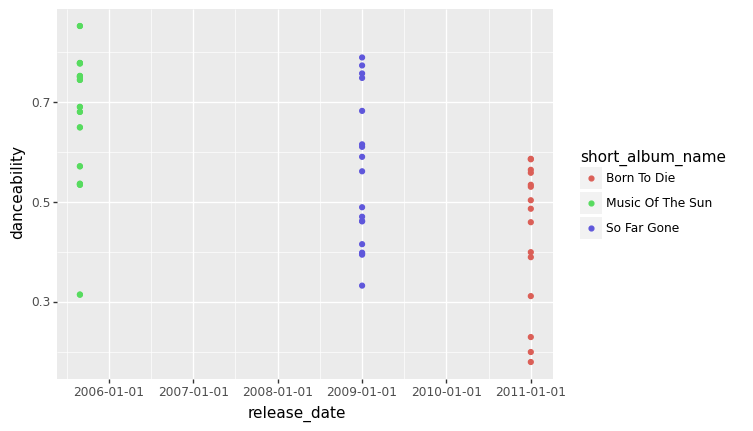

<ggplot: (8786559581820)>

In [334]:
(ggplot(df, aes('release_date','danceability',  color='short_album_name'))
 + geom_point()
 )


In [ ]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,track_name,album_name,short_album_name,release_date,album_id
648,0.778,0.737,7,-7.861,1,0.2510,0.000310,0.000000,0.2760,0.582,...,spotify:track:1B4iEymNy6FyU2I39ujzVw,https://api.spotify.com/v1/tracks/1B4iEymNy6Fy...,https://api.spotify.com/v1/audio-analysis/1B4i...,217187,4,Pon De Replay - Remix,Music Of The Sun,Music Of The Sun,2005-08-29,4FyGpObwABjn0o8Tdp7AZz
622,0.756,0.632,7,-8.441,1,0.1640,0.000165,0.000886,0.0963,0.505,...,spotify:track:3U3Ff8ZvL6oEu1r98gCCWW,https://api.spotify.com/v1/tracks/3U3Ff8ZvL6oE...,https://api.spotify.com/v1/audio-analysis/3U3F...,246960,4,Pon de Replay,Music Of The Sun,Music Of The Sun,2005-08-29,19UbDbyaYRW1U7lBMYO9F2
623,0.677,0.614,8,-5.935,1,0.0732,0.000364,0.001580,0.1070,0.643,...,spotify:track:6N2E4G9gU2yxJYJndMPsYE,https://api.spotify.com/v1/tracks/6N2E4G9gU2yx...,https://api.spotify.com/v1/audio-analysis/6N2E...,251133,4,Here I Go Again,Music Of The Sun,Music Of The Sun,2005-08-29,19UbDbyaYRW1U7lBMYO9F2
624,0.572,0.693,8,-7.492,1,0.2690,0.100000,0.000000,0.0426,0.757,...,spotify:track:1Q29dre9FCspRSarHziizl,https://api.spotify.com/v1/tracks/1Q29dre9FCsp...,https://api.spotify.com/v1/audio-analysis/1Q29...,208107,4,If It's Lovin' That You Want,Music Of The Sun,Music Of The Sun,2005-08-29,19UbDbyaYRW1U7lBMYO9F2
625,0.692,0.678,2,-6.517,1,0.0840,0.006530,0.000002,0.1390,0.610,...,spotify:track:1vSCj9zmP1zRD1D5ruLUkR,https://api.spotify.com/v1/tracks/1vSCj9zmP1zR...,https://api.spotify.com/v1/audio-analysis/1vSC...,260067,4,"You Don't Love Me (No, No, No)",Music Of The Sun,Music Of The Sun,2005-08-29,19UbDbyaYRW1U7lBMYO9F2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.513,0.692,9,-6.030,1,0.0398,0.366000,0.000000,0.1510,0.534,...,spotify:track:1p9R4HF2WGtZDISBxMwF3R,https://api.spotify.com/v1/tracks/1p9R4HF2WGtZ...,https://api.spotify.com/v1/audio-analysis/1p9R...,222000,1,No Digas Mi Nombre,Black Panther: Wakanda Forever - Music From an...,Black Panther: Wakanda Forever - Music From an...,2022-11-11,06RK0wX4GqHcxBtHlVoGH5
18,0.570,0.510,5,-13.850,1,0.7650,0.718000,0.000467,0.0979,0.138,...,spotify:track:3c1YCQvr720s61gHPgtkv8,https://api.spotify.com/v1/tracks/3c1YCQvr720s...,https://api.spotify.com/v1/audio-analysis/3c1Y...,160480,3,Mi Pueblo,Black Panther: Wakanda Forever - Music From an...,Black Panther: Wakanda Forever - Music From an...,2022-11-11,06RK0wX4GqHcxBtHlVoGH5
19,0.465,0.260,0,-8.179,0,0.0310,0.475000,0.000000,0.1380,0.259,...,spotify:track:18zQTt3ifDv6iLni2YuXMg,https://api.spotify.com/v1/tracks/18zQTt3ifDv6...,https://api.spotify.com/v1/audio-analysis/18zQ...,213333,4,Born Again,Black Panther: Wakanda Forever - Music From an...,Black Panther: Wakanda Forever - Music From an...,2022-11-11,06RK0wX4GqHcxBtHlVoGH5
10,0.787,0.598,1,-7.457,1,0.2120,0.573000,0.000002,0.1030,0.820,...,spotify:track:02dF3qjpgTpmPCBKo72C06,https://api.spotify.com/v1/tracks/02dF3qjpgTpm...,https://api.spotify.com/v1/audio-analysis/02dF...,224747,4,Laayli' kuxa'ano'one,Black Panther: Wakanda Forever - Music From an...,Black Panther: Wakanda Forever - Music From an...,2022-11-11,06RK0wX4GqHcxBtHlVoGH5


In [310]:
API_KEY = 'XXX'
USER_AGENT = 'Dataquest'

In [311]:
import requests

headers = {
    'user-agent': USER_AGENT
}

payload = {
    'api_key': API_KEY,
    'method': 'chart.gettopartists',
    'format': 'json'
}

r = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=payload)
r.status_code

200

In [312]:
def lastfm_get(payload):
    # define headers and URL
    headers = {'user-agent': USER_AGENT}
    url = 'https://ws.audioscrobbler.com/2.0/'

    # Add API key and format to the payload
    payload['api_key'] = API_KEY
    payload['format'] = 'json'

    response = requests.get(url, headers=headers, params=payload)
    return response

In [313]:
r = lastfm_get({
    'method': 'chart.gettopartists'
})

r.status_code

200

In [314]:
import json

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(r.json())

{
    "artists": {
        "@attr": {
            "page": "1",
            "perPage": "50",
            "total": "4614402",
            "totalPages": "92289"
        },
        "artist": [
            {
                "image": [
                    {
                        "#text": "https://lastfm.freetls.fastly.net/i/u/34s/2a96cbd8b46e442fc41c2b86b821562f.png",
                        "size": "small"
                    },
                    {
                        "#text": "https://lastfm.freetls.fastly.net/i/u/64s/2a96cbd8b46e442fc41c2b86b821562f.png",
                        "size": "medium"
                    },
                    {
                        "#text": "https://lastfm.freetls.fastly.net/i/u/174s/2a96cbd8b46e442fc41c2b86b821562f.png",
                        "size": "large"
                    },
                    {
                        "#text": "https://lastfm.freetls.fastly.net/i/u/300x300/2a96cbd8b46e442fc41c2b86b821562f.png",
                        "si

In [315]:
jprint(r.json()['artists']['@attr'])

{
    "page": "1",
    "perPage": "50",
    "total": "4614402",
    "totalPages": "92289"
}


In [316]:
from requests_cache import CachedSession, RedisCache, json_serializer

In [317]:
import requests_cache

requests_cache.install_cache()

In [318]:
import time
from IPython.core.display import clear_output

responses = []

page = 1
total_pages = 99999 

while page <= total_pages:
    payload = {
        'method': 'chart.gettopartists',
        'limit': 500,
        'page': page
    }

    # print some output so we can see the status
    print("Requesting page {}/{}".format(page, total_pages))
    # clear the output to make things neater
    clear_output(wait = True)

    # make the API call
    response = lastfm_get(payload)

    # if we get an error, print the response and halt the loop
    if response.status_code != 200:
        print(response.text)
        break

    # extract page info
    page = int(response.json()['artists']['@attr']['page'])
    total_pages = int(response.json()['artists']['@attr']['totalPages'])

    # append response
    responses.append(response)

    # if it's not a cached result, sleep
    if not getattr(response, 'from_cache', False):
        time.sleep(0.25)

    # increment the page number
    page += 1

Requesting page 9188/9188


In [323]:
r0 = responses[0]
r0_json = r0.json()
r0_artists = r0_json['artists']['artist']
r0_df = pd.DataFrame(r0_artists)
r0_df['name']

0          The Weeknd
1        Taylor Swift
2                 SZA
3             Rihanna
4      Kendrick Lamar
            ...      
495        Bo Burnham
496         Sean Paul
497    Lynyrd Skynyrd
498        Jhené Aiko
499          Pavement
Name: name, Length: 500, dtype: object

In [324]:
pop_artists_list = r0_df['name'].values.tolist()

In [325]:
pop_artists_list

['The Weeknd',
 'Taylor Swift',
 'SZA',
 'Rihanna',
 'Kendrick Lamar',
 'Kanye West',
 'Drake',
 'Lana Del Rey',
 'Arctic Monkeys',
 'pinkpantheress',
 'Gorillaz',
 'Tyler, the Creator',
 'Frank Ocean',
 'Harry Styles',
 'Billie Eilish',
 'Doja Cat',
 'Lady Gaga',
 'Ariana Grande',
 'Beyoncé',
 'Radiohead',
 'Tame Impala',
 'Coldplay',
 'Miley Cyrus',
 'Steve Lacy',
 'Paramore',
 'Childish Gambino',
 'Eminem',
 'The Neighbourhood',
 'Post Malone',
 'Joji',
 'Bruno Mars',
 'Metro Boomin',
 'Nirvana',
 'Kali Uchis',
 'LIL UZI VERT',
 'Mac DeMarco',
 'Katy Perry',
 'Mac Miller',
 'Queen',
 'Mitski',
 'Jay-Z',
 'The Beatles',
 'Travis Scott',
 'The Smiths',
 'Playboi Carti',
 'Lorde',
 'J. Cole',
 'Calvin Harris',
 'xxxtentacion',
 'Olivia Rodrigo',
 'Sam Smith',
 'A$AP Rocky',
 'Nicki Minaj',
 'Adele',
 'The Strokes',
 'Clairo',
 'Dua Lipa',
 'Fleetwood Mac',
 'Maroon 5',
 'Linkin Park',
 'The Cure',
 'Justin Bieber',
 'TV Girl',
 'Baby Keem',
 'Future',
 'Michael Jackson',
 'Pink Floyd',

In [320]:
frames = [pd.DataFrame(r.json()['artists']['artist']) for r in responses]
artists = pd.concat(frames)
artists.head()

,name,playcount,listeners,mbid,url,streamable,image
0,The Weeknd,427450134,3125939,c8b03190-306c-4120-bb0b-6f2ebfc06ea9,https://www.last.fm/music/The+Weeknd,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
1,Taylor Swift,1185775625,3818727,20244d07-534f-4eff-b4d4-930878889970,https://www.last.fm/music/Taylor+Swift,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
2,SZA,174163219,1728754,272989c8-5535-492d-a25c-9f58803e027f,https://www.last.fm/music/SZA,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
3,Rihanna,308530183,6011573,db36a76f-4cdf-43ac-8cd0-5e48092d2bae,https://www.last.fm/music/Rihanna,0,[{'#text': 'https://lastfm.freetls.fastly.net/...
4,Kendrick Lamar,352334970,2885043,381086ea-f511-4aba-bdf9-71c753dc5077,https://www.last.fm/music/Kendrick+Lamar,0,[{'#text': 'https://lastfm.freetls.fastly.net/...


In [321]:
artists = artists.drop('image', axis=1)
artists.head()

,name,playcount,listeners,mbid,url,streamable
0,The Weeknd,427450134,3125939,c8b03190-306c-4120-bb0b-6f2ebfc06ea9,https://www.last.fm/music/The+Weeknd,0
1,Taylor Swift,1185775625,3818727,20244d07-534f-4eff-b4d4-930878889970,https://www.last.fm/music/Taylor+Swift,0
2,SZA,174163219,1728754,272989c8-5535-492d-a25c-9f58803e027f,https://www.last.fm/music/SZA,0
3,Rihanna,308530183,6011573,db36a76f-4cdf-43ac-8cd0-5e48092d2bae,https://www.last.fm/music/Rihanna,0
4,Kendrick Lamar,352334970,2885043,381086ea-f511-4aba-bdf9-71c753dc5077,https://www.last.fm/music/Kendrick+Lamar,0


In [322]:
artists.info()
artists.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14500 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        14500 non-null  object
 1   playcount   14500 non-null  object
 2   listeners   14500 non-null  object
 3   mbid        14500 non-null  object
 4   url         14500 non-null  object
 5   streamable  14500 non-null  object
dtypes: object(6)
memory usage: 793.0+ KB


,name,playcount,listeners,mbid,url,streamable
count,14500,14500,14500,14500,14500,14500
unique,9998,9998,9916,5563,9998,1
top,Sheck Wes,704777,493360,,https://www.last.fm/music/Sheck+Wes,0
freq,3,3,4,6447,3,14500


In [ ]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,track_name,album_name,short_album_name,release_date,album_id
648,0.778,0.737,7,-7.861,1,0.2510,0.000310,0.000000,0.2760,0.582,...,spotify:track:1B4iEymNy6FyU2I39ujzVw,https://api.spotify.com/v1/tracks/1B4iEymNy6Fy...,https://api.spotify.com/v1/audio-analysis/1B4i...,217187,4,Pon De Replay - Remix,Music Of The Sun,Music Of The Sun,2005-08-29,4FyGpObwABjn0o8Tdp7AZz
622,0.756,0.632,7,-8.441,1,0.1640,0.000165,0.000886,0.0963,0.505,...,spotify:track:3U3Ff8ZvL6oEu1r98gCCWW,https://api.spotify.com/v1/tracks/3U3Ff8ZvL6oE...,https://api.spotify.com/v1/audio-analysis/3U3F...,246960,4,Pon de Replay,Music Of The Sun,Music Of The Sun,2005-08-29,19UbDbyaYRW1U7lBMYO9F2
623,0.677,0.614,8,-5.935,1,0.0732,0.000364,0.001580,0.1070,0.643,...,spotify:track:6N2E4G9gU2yxJYJndMPsYE,https://api.spotify.com/v1/tracks/6N2E4G9gU2yx...,https://api.spotify.com/v1/audio-analysis/6N2E...,251133,4,Here I Go Again,Music Of The Sun,Music Of The Sun,2005-08-29,19UbDbyaYRW1U7lBMYO9F2
624,0.572,0.693,8,-7.492,1,0.2690,0.100000,0.000000,0.0426,0.757,...,spotify:track:1Q29dre9FCspRSarHziizl,https://api.spotify.com/v1/tracks/1Q29dre9FCsp...,https://api.spotify.com/v1/audio-analysis/1Q29...,208107,4,If It's Lovin' That You Want,Music Of The Sun,Music Of The Sun,2005-08-29,19UbDbyaYRW1U7lBMYO9F2
625,0.692,0.678,2,-6.517,1,0.0840,0.006530,0.000002,0.1390,0.610,...,spotify:track:1vSCj9zmP1zRD1D5ruLUkR,https://api.spotify.com/v1/tracks/1vSCj9zmP1zR...,https://api.spotify.com/v1/audio-analysis/1vSC...,260067,4,"You Don't Love Me (No, No, No)",Music Of The Sun,Music Of The Sun,2005-08-29,19UbDbyaYRW1U7lBMYO9F2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.513,0.692,9,-6.030,1,0.0398,0.366000,0.000000,0.1510,0.534,...,spotify:track:1p9R4HF2WGtZDISBxMwF3R,https://api.spotify.com/v1/tracks/1p9R4HF2WGtZ...,https://api.spotify.com/v1/audio-analysis/1p9R...,222000,1,No Digas Mi Nombre,Black Panther: Wakanda Forever - Music From an...,Black Panther: Wakanda Forever - Music From an...,2022-11-11,06RK0wX4GqHcxBtHlVoGH5
18,0.570,0.510,5,-13.850,1,0.7650,0.718000,0.000467,0.0979,0.138,...,spotify:track:3c1YCQvr720s61gHPgtkv8,https://api.spotify.com/v1/tracks/3c1YCQvr720s...,https://api.spotify.com/v1/audio-analysis/3c1Y...,160480,3,Mi Pueblo,Black Panther: Wakanda Forever - Music From an...,Black Panther: Wakanda Forever - Music From an...,2022-11-11,06RK0wX4GqHcxBtHlVoGH5
19,0.465,0.260,0,-8.179,0,0.0310,0.475000,0.000000,0.1380,0.259,...,spotify:track:18zQTt3ifDv6iLni2YuXMg,https://api.spotify.com/v1/tracks/18zQTt3ifDv6...,https://api.spotify.com/v1/audio-analysis/18zQ...,213333,4,Born Again,Black Panther: Wakanda Forever - Music From an...,Black Panther: Wakanda Forever - Music From an...,2022-11-11,06RK0wX4GqHcxBtHlVoGH5
10,0.787,0.598,1,-7.457,1,0.2120,0.573000,0.000002,0.1030,0.820,...,spotify:track:02dF3qjpgTpmPCBKo72C06,https://api.spotify.com/v1/tracks/02dF3qjpgTpm...,https://api.spotify.com/v1/audio-analysis/02dF...,224747,4,Laayli' kuxa'ano'one,Black Panther: Wakanda Forever - Music From an...,Black Panther: Wakanda Forever - Music From an...,2022-11-11,06RK0wX4GqHcxBtHlVoGH5


In [1]:
import datetime
import billboard
import pandas as pd
from collections import defaultdict

# Initiate the dictionary to store artist data
artist_data = defaultdict(int)

# Set the date for 5 years ago
date = datetime.datetime.now() - datetime.timedelta(weeks=20)

# Loop over each week for the past 5 years
while date < datetime.datetime.now():
    # Fetch the top 100 songs for this week
    chart = billboard.ChartData('hot-100', date=date.strftime('%Y-%m-%d'))

    # Loop over each song in the chart
    for song in chart:
        # Loop over each artist for the song (songs can have multiple artists)
        for artist in song.artist.split(' Featuring '):
            # Increment the number of weeks this artist has been in the top 100
            artist_data[artist] += 1

    # Increment the date by one week
    date += datetime.timedelta(weeks=1)

In [2]:
# Convert the artist data into a DataFrame
df = pd.DataFrame(list(artist_data.items()), columns=['Artist', 'WeeksInTop100'])

# Sort the DataFrame by the number of weeks in the top 100
df = df.sort_values('WeeksInTop100', ascending=False)

# Print the top 10 artists
print(df.head(10))

                Artist  WeeksInTop100
42       Morgan Wallen            225
10                 SZA            145
61          Luke Combs             61
7         Taylor Swift             54
19   Drake & 21 Savage             53
100           Lil Baby             47
60       Lainey Wilson             35
38          Zach Bryan             35
47        Lil Uzi Vert             27
54    Bailey Zimmerman             26


In [3]:
import datetime
import billboard
import pandas as pd
from collections import defaultdict

# Initiate the dictionary to store artist data
artist_data = defaultdict(int)

# Set the date for 5 years ago
date = datetime.datetime.now() - datetime.timedelta(weeks=5*52)

# Loop over each week for the past 5 years
while date < datetime.datetime.now():
    # Fetch the top 100 songs for this week
    chart = billboard.ChartData('hot-100', date=date.strftime('%Y-%m-%d'))

    # Loop over each song in the chart
    for song in chart:
        # Loop over each artist for the song (songs can have multiple artists)
        for artist in song.artist.split(' Featuring '):
            # Increment the number of weeks this artist has been in the top 100
            artist_data[artist] += 1

    # Increment the date by one week
    date += datetime.timedelta(weeks=1)

# Convert the artist data into a DataFrame
df = pd.DataFrame(list(artist_data.items()), columns=['Artist', 'Total Chart Entries Weekly for Past 5 years'])

# Sort the DataFrame by the number of weeks in the top 100
df = df.sort_values('Total Chart Entries Weekly for Past 5 years', ascending=False)

# Print the top 10 artists
print(df.head(10))

            Artist  Total Chart Entries Weekly for Past 5 years
0            Drake                                          846
54   Morgan Wallen                                          638
78        Lil Baby                                          504
33    Taylor Swift                                          437
37      Luke Combs                                          379
2      Post Malone                                          378
523       Doja Cat                                          378
367         DaBaby                                          337
397            SZA                                          310
178  Billie Eilish                                          281


In [6]:
topten_df = (df.head(10))


In [11]:
topten_df['Artist']

0              Drake
54     Morgan Wallen
78          Lil Baby
33      Taylor Swift
37        Luke Combs
2        Post Malone
523         Doja Cat
367           DaBaby
397              SZA
178    Billie Eilish
Name: Artist, dtype: object

In [12]:
topten_list = topten_df['Artist'].values.tolist()

In [13]:
topten_list

['Drake',
 'Morgan Wallen',
 'Lil Baby',
 'Taylor Swift',
 'Luke Combs',
 'Post Malone',
 'Doja Cat',
 'DaBaby',
 'SZA',
 'Billie Eilish']